In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('Text_Similarity_Dataset.csv')


In [19]:
data.head()

Unique_ID                                              text1  \
0          0  savvy searchers fail to spot ads internet sear...   
1          1  millions to miss out on the net by 2025  40% o...   
2          2  young debut cut short by ginepri fifteen-year-...   
3          3  diageo to buy us wine firm diageo  the world s...   
4          4  be careful how you code a new european directi...   

                                               text2  
0  newcastle 2-1 bolton kieron dyer smashed home ...  
1  nasdaq planning $100m share sale the owner of ...  
2  ruddock backs yapp s credentials wales coach m...  
3  mci shares climb on takeover bid shares in us ...  
4  media gadgets get moving pocket-sized devices ...

In [16]:
import gensim.parsing.preprocessing as pre

In [122]:
dir(pre)

['DEFAULT_FILTERS',
 'PorterStemmer',
 'RE_AL_NUM',
 'RE_NONALPHA',
 'RE_NUMERIC',
 'RE_NUM_AL',
 'RE_PUNCT',
 'RE_TAGS',
 'RE_WHITESPACE',
 'STOPWORDS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'glob',
 'preprocess_documents',
 'preprocess_string',
 're',
 'read_file',
 'read_files',
 'remove_stopwords',
 'split_alphanum',
 'stem',
 'stem_text',
 'string',
 'strip_multiple_whitespaces',
 'strip_non_alphanum',
 'strip_numeric',
 'strip_punctuation',
 'strip_punctuation2',
 'strip_short',
 'strip_tags',
 'utils']

In [22]:
from multiprocessing import Pool

In [24]:
cores = 4  # number of cores available

In [125]:
type(text1_processed), type(text1_processed[0])

NameError: name 'text1_processed' is not defined

In [145]:
preprocess("Hi how are you doun ajdfj blaj")

['doun', 'ajdfj', 'blaj']

In [20]:
def preprocess(s:'str')->'preprocessed string without stemming':
    return pre.preprocess_string(s ,filters=[
                                            pre.strip_tags,
                                            pre.strip_punctuation,
                                            pre.strip_multiple_whitespaces,
                                            pre.strip_numeric,
                                            pre.remove_stopwords,
                                            pre.strip_short,
                                            pre.strip_non_alphanum
                                            ]
                                )

In [22]:
%who

K	 NamespaceMagics	 Pool	 cores	 data	 get_ipython	 getsizeof	 json	 lemmatize	 
np	 p	 pd	 pre	 preprocess	 pyspark	 text1_processed	 text2_processed	 tf	 



In [25]:
%%time
with Pool(cores) as p:
    text1_processed, text2_processed = p.map(preprocess, data.text1), p.map(preprocess,  data.text2)

CPU times: user 279 ms, sys: 92.6 ms, total: 372 ms
Wall time: 2.8 s


In [129]:
%xdel data

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/amit/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [136]:
type(text1_processed), type(text1_processed[0])

(list, list)

In [144]:
text2_processed

[['newcastle',
  'bolton',
  'kieron',
  'dyer',
  'smashed',
  'home',
  'winner',
  'end',
  'bolton',
  'game',
  'unbeaten',
  'run',
  'lee',
  'bowyer',
  'newcastle',
  'ahead',
  'fed',
  'stephen',
  'carr',
  'right',
  'flank',
  'sprinted',
  'area',
  'power',
  'home',
  'header',
  'resultant',
  'cross',
  'wanderers',
  'hit',
  'stelios',
  'giannakopoulos',
  'ended',
  'fluid',
  'passing',
  'struck',
  'volley',
  'dyer',
  'word',
  'game',
  'chances',
  'pouncing',
  'loose',
  'ball',
  'alan',
  'shearer',
  'shot',
  'blocked',
  'firing',
  'corner',
  'lacked',
  'urgency',
  'early',
  'stages',
  'game',
  'plenty',
  'tackles',
  'flying',
  'opportunities',
  'goal',
  'harder',
  'come',
  'bolton',
  'keeper',
  'jussi',
  'jaaskelainen',
  'saves',
  'quick',
  'succession',
  'midway',
  'half',
  'keeping',
  'shearer',
  'low',
  'shot',
  'dyer',
  'close',
  'range',
  'header',
  'goalmouth',
  'action',
  'note',
  'magpies',
  'took',
  'lea

In [63]:
%xdel text1_processed

In [64]:
%xdel text2_processed

In [27]:
%%time
with Pool(cores) as p:
    text_1 = [p.map(lemmatizer.lemmatize, x) for x in text1_processed]

CPU times: user 3.43 s, sys: 769 ms, total: 4.2 s
Wall time: 8.29 s


In [51]:
del test_docs_1

In [28]:
%%time
with Pool(cores) as p:
    text_2 = [p.map(lemmatizer.lemmatize, x) for x in text2_processed]

CPU times: user 3.43 s, sys: 761 ms, total: 4.19 s
Wall time: 8.08 s


In [53]:
%xdel test_docs_2

In [29]:
#python example to infer document vectors from trained doc2vec model
import gensim.models as g
import codecs
import numpy as np

In [30]:
#parameters
model="apnews_dbow/doc2vec.bin"

In [31]:
#inference hyper-parameters
start_alpha=0.01 # defaults
infer_epoch=1000 # defaults

In [32]:
%%time
#load model
m = g.Doc2Vec.load(model)

CPU times: user 1.66 s, sys: 531 ms, total: 2.19 s
Wall time: 12.4 s


In [33]:
%%time
with Pool(cores) as p:
    text1_rep = p.map(m.infer_vector, text_1)

CPU times: user 23 s, sys: 13.8 s, total: 36.8 s
Wall time: 57 s


In [34]:
%%time
with Pool(cores) as p:
    text2_rep = p.map(m.infer_vector, text_2)

CPU times: user 23.2 s, sys: 13.7 s, total: 36.8 s
Wall time: 54.9 s


In [35]:
text1_rep_np = np.array(text1_rep)

In [67]:
%xdel text1_rep

In [36]:
%time
text2_rep_np = np.array(text2_rep)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 12.4 µs


In [69]:
%xdel text2_rep

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
%%time
cos_sim = cosine_similarity(text1_rep_np, text2_rep_np)

CPU times: user 389 ms, sys: 47.3 ms, total: 436 ms
Wall time: 1.38 s


In [53]:
from multiprocessing import Process

In [59]:
%%time
cos_sim = cosine_similarity(text1_rep_np, text2_rep_np)

CPU times: user 212 ms, sys: 11.9 ms, total: 224 ms
Wall time: 116 ms


In [74]:
cosine_sim = []

In [78]:
%%time
for i in range(cos_sim.shape[0]):
    cosine_sim.append(cos_sim[i][i])

CPU times: user 3.47 ms, sys: 0 ns, total: 3.47 ms
Wall time: 3.62 ms


In [79]:
cosine_sim = np.array(cosine_sim)

In [80]:
maxx = np.argmax([x for x in cosine_sim if x != max(cosine_sim)])

In [81]:
minn = min(cosine_sim)

In [82]:
minn

-0.0025343653

In [78]:
temp_data = data

In [83]:
maxx

2284

3403

## Plotting the cosine_sim

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
data = pd.read_csv('Text_Similarity_Dataset.csv')


In [85]:
type(data.Unique_ID)

pandas.core.series.Series

In [86]:
type(np.array(data.Unique_ID))

numpy.ndarray

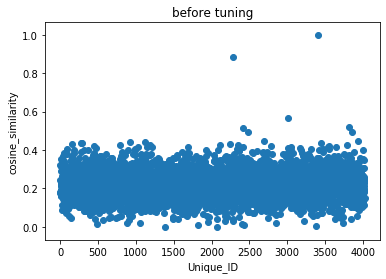

In [88]:
x = np.array(data.Unique_ID)
y = cosine_sim
plt.scatter(x,y)
plt.title("before tuning")
plt.xlabel("Unique_ID")
plt.ylabel("cosine_similarity")
plt.show()

# Transfer Learning - Trainig - fine tuning the the apnews_dbow model

In [98]:
import logging

#doc2vec parameters
vector_size = 300
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0 #0 = dbow; 1 = dmpv
worker_count = 4 #number of parallel processes

In [95]:

#pretrained word embeddings
pretrained_emb = '/home/amit/internship/NLP/apnews_dbow/doc2vec.bin'
# pretrained_emb = "toy_data/pretrained_word_embeddings.txt" #None if use without pretrained embeddings

#input corpus
train_corpus_2 = "my_train_docs.txt"

#output model
saved_path = "try2_model.bin"

In [91]:
#enable logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [92]:
text1 = ''
i=0
for x in data.text1:
    i+= 1
    text1 += x
    text1 += '\n'

In [93]:
text2 = ''
i=0
for x in data.text2:
    i+= 1
    text2 += x
    text2 += '\n'

In [94]:
text = text1 + '\n' + text2

In [96]:
with open(train_corpus_2, mode = 'w') as f:
    f.write(text)

In [97]:
%%time
#train doc2vec model
docs = g.doc2vec.TaggedLineDocument(train_corpus)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 19.3 µs


In [ ]:
%%time
#train doc2vec model
model = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)


/home/amit/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/home/amit/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2019-11-27 01:45:53,154 : INFO : collecting all words and their counts
2019-11-27 01:45:53,155 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-11-27 01:45:53,923 : INFO : collected 43771 word types and 8047 unique tags from a corpus of 8047 examples and 3146284 words
2019-11-27 01:45:53,924 : INFO : Loading a fresh vocabulary
2019-11-27 01:45:54,205 : INFO : effective_min_count=1 retains 4377

In [101]:
#save model
model.save(saved_path)

2019-11-27 02:25:42,943 : INFO : saving Doc2Vec object under try2_model.bin, separately None
2019-11-27 02:25:42,945 : INFO : storing np array 'syn1neg' to try2_model.bin.trainables.syn1neg.npy
2019-11-27 02:25:43,165 : INFO : storing np array 'vectors' to try2_model.bin.wv.vectors.npy
2019-11-27 02:25:43,370 : INFO : saved try2_model.bin


In [102]:
model= saved_path

In [103]:
%%time
#load model
m = g.Doc2Vec.load(model)

2019-11-27 02:31:51,217 : INFO : loading Doc2Vec object from try2_model.bin
2019-11-27 02:31:51,395 : INFO : loading vocabulary recursively from try2_model.bin.vocabulary.* with mmap=None
2019-11-27 02:31:51,395 : INFO : loading trainables recursively from try2_model.bin.trainables.* with mmap=None
2019-11-27 02:31:51,396 : INFO : loading syn1neg from try2_model.bin.trainables.syn1neg.npy with mmap=None
2019-11-27 02:31:51,413 : INFO : loading wv recursively from try2_model.bin.wv.* with mmap=None
2019-11-27 02:31:51,414 : INFO : loading vectors from try2_model.bin.wv.vectors.npy with mmap=None
2019-11-27 02:31:51,431 : INFO : loading docvecs recursively from try2_model.bin.docvecs.* with mmap=None
2019-11-27 02:31:51,432 : INFO : loaded try2_model.bin


CPU times: user 342 ms, sys: 60 ms, total: 402 ms
Wall time: 399 ms


In [13]:
%%time
with Pool(cores) as p:
    text1_rep = p.map(m.infer_vector, text_1)

NameError: name 'Pool' is not defined

In [151]:
%%time
with Pool(cores) as p:
    text2_rep = p.map(m.infer_vector, text_2)

CPU times: user 4.01 s, sys: 2.21 s, total: 6.22 s
Wall time: 1min 3s


In [152]:
%xdel text_1

In [153]:
%xdel text_2

In [12]:
text1_rep_np = np.array(text1_rep)

NameError: name 'text1_rep' is not defined

In [155]:
%xdel text1_rep

In [156]:
%time
text2_rep_np = np.array(text2_rep)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.3 µs


In [157]:
%xdel text2_rep

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [158]:
%%time
cos_sim = cosine_similarity(text1_rep_np, text2_rep_np)

CPU times: user 171 ms, sys: 7.99 ms, total: 179 ms
Wall time: 93 ms


In [160]:
cosine_sim = []

In [163]:
cosine_sim_tuned = []

In [164]:
%%time
for i in range(cos_sim.shape[0]):
    cosine_sim_tuned.append(cos_sim[i][i])

CPU times: user 0 ns, sys: 3.8 ms, total: 3.8 ms
Wall time: 3.72 ms


In [165]:
cosine_sim_tuned = np.array(cosine_sim_tuned)

In [167]:
data = pd.read_csv("Text_Similarity_Dataset.csv")

# plot the graph

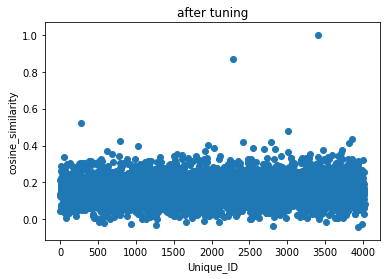

In [169]:
x = np.array(data.Unique_ID)
y = cosine_sim_tuned
plt.scatter(x,y)
plt.title("after tuning")
plt.xlabel("Unique_ID")
plt.ylabel("cosine_similarity")
plt.show()

## train again by increasing the vector size

### Lets find out the average word count for each column in data

In [195]:
def avg(c:'column', data :'data frame' = data)->'int':
    summ = 0
    for x in data[c]:
        a=x.split()
        summ += len(a)
    return summ/len(data)

In [196]:
avg('text1')

390.55058414118815

In [197]:
avg('text2')

391.5234899328859

## lets use vector_size = 500

In [200]:
import logging

#doc2vec parameters
vector_size = 500
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0 #0 = dbow; 1 = dmpv
worker_count = 4 #number of parallel processes

In [201]:

#pretrained word embeddings
pretrained_emb = '/home/amit/internship/NLP/apnews_dbow/doc2vec.bin'
# pretrained_emb = "toy_data/pretrained_word_embeddings.txt" #None if use without pretrained embeddings

#input corpus
train_corpus_2 = "my_train_docs.txt"

#output model
saved_path = "try2.2_model.bin"

In [202]:
%%time
#train doc2vec model
docs = g.doc2vec.TaggedLineDocument(train_corpus)

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 14.1 µs


In [ ]:
%%time
#train doc2vec model
model = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)


/home/amit/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/home/amit/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2019-11-27 03:34:14,526 : INFO : collecting all words and their counts
2019-11-27 03:34:14,527 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-11-27 03:34:15,362 : INFO : collected 43771 word types and 8047 unique tags from a corpus of 8047 examples and 3146284 words
2019-11-27 03:34:15,362 : INFO : Loading a fresh vocabulary
2019-11-27 03:34:15,442 : INFO : effective_min_count=1 retains 4377

In [101]:
#save model
model.save(saved_path)

2019-11-27 02:25:42,943 : INFO : saving Doc2Vec object under try2_model.bin, separately None
2019-11-27 02:25:42,945 : INFO : storing np array 'syn1neg' to try2_model.bin.trainables.syn1neg.npy
2019-11-27 02:25:43,165 : INFO : storing np array 'vectors' to try2_model.bin.wv.vectors.npy
2019-11-27 02:25:43,370 : INFO : saved try2_model.bin


# Directly using gensim

In [2]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.similarities import MatrixSimilarity

In [3]:
query = [(1, 2), (5, 4)]
index = MatrixSimilarity(common_corpus, num_features=len(common_dictionary))
sims = index[query]

In [6]:
import gensim 

In [7]:
gensim.models.WordEmbeddingSimilarityIndex()

gensim.models.keyedvectors.WordEmbeddingSimilarityIndex

In [9]:
from gensim.similarities import Similarity

In [39]:
from gensim.corpora.textcorpus import TextCorpus
from gensim.test.utils import datapath, gettmpfile
from gensim.similarities import Similarity
temp_fname = get_tmpfile("index")
output_fname = get_tmpfile("saved_index")
corpus = TextCorpus(datapath('testcorpus.txt'))
index = Similarity(output_fname, corpus, num_features=400)
index.save(output_fname)
loaded_index = index.load(output_fname)

In [38]:
Similarity("hi", "bye")

TypeError: __init__() missing 1 required positional argument: 'num_features'